# Understading K-Means Clustering using sklearn Package

---

*Uploading CSV* :



In [1]:
# prompt: upload csv

from google.colab import files
uploaded = files.upload()

Saving housing.csv to housing.csv


In [2]:
import pandas as pd

df = pd.read_csv('./housing.csv')
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


## Elbow Method

```
# Generating Elbow Method using Mathplotib
```


---




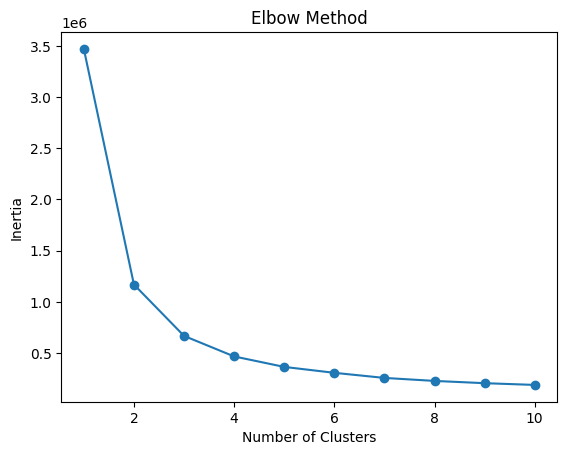

In [3]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = list(zip(df.MedInc, df.HouseAge, df.AveRooms))
inertias = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The code you’ve written above is performing K-means clustering on a dataset and using the Elbow Method to determine the optimal number of clusters. Let's break down each part of the code:

### 1. **Imports**:
```python
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
```
- **`from sklearn.cluster import KMeans`**: Imports the KMeans class from the `sklearn.cluster` module, which is used to apply the K-means clustering algorithm.
- **`import matplotlib.pyplot as plt`**: Imports the `pyplot` module from `matplotlib`, which is used for plotting graphs.

### 2. **Preparing the Data**:
```python
data = list(zip(df.MedInc, df.HouseAge, df.AveRooms))
```
- **`df.MedInc, df.HouseAge, df.AveRooms`**: These are columns from a DataFrame `df`. The columns represent features like median income, house age, and average rooms, which are being used as input features for clustering.
- **`list(zip(...))`**: Combines these features into a list of tuples where each tuple represents a data point in the feature space. Each tuple has the format `(MedInc, HouseAge, AveRooms)`.

### 3. **Calculating Inertia for Different Cluster Counts**:
```python
inertias = []
```
- **`inertias = []`**: Initializes an empty list to store the inertia (a measure of how well the data points fit within a cluster) for each number of clusters.

```python
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)
```
- **`for i in range(1, 11):`**: Loops over different numbers of clusters, from 1 to 10.
- **`kmeans = KMeans(n_clusters=i, n_init=10, random_state=0)`**: Initializes the KMeans model with `i` clusters. Key parameters:
  - **`n_clusters=i`**: Specifies the current number of clusters.
  - **`n_init=10`**: Runs the K-means algorithm 10 times with different centroid seeds and takes the best result.
  - **`random_state=0`**: Ensures the results are reproducible by setting a fixed seed.
- **`kmeans.fit(data)`**: Fits the KMeans model to the data, computing the cluster centroids and assigning each data point to a cluster.
- **`inertias.append(kmeans.inertia_)`**: Stores the calculated inertia for the current number of clusters in the `inertias` list. Inertia is the sum of squared distances of samples to their nearest cluster center, which helps evaluate how well the clustering is done.

### 4. **Plotting the Elbow Curve**:
```python
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
```
- **`plt.plot(range(1, 11), inertias, marker='o')`**: Plots the number of clusters on the x-axis against inertia on the y-axis. The `marker='o'` argument ensures that each data point is marked with a circle.
- **`plt.title('Elbow Method')`**: Sets the title of the plot.
- **`plt.xlabel('Number of Clusters')`**: Labels the x-axis as "Number of Clusters".
- **`plt.ylabel('Inertia')`**: Labels the y-axis as "Inertia".
- **`plt.show()`**: Displays the plot.

### 5. **Interpreting the Elbow Method**:
The "Elbow Method" is used to determine the optimal number of clusters. The idea is to find the point where adding more clusters doesn’t significantly decrease the inertia. This point typically appears as a "bend" or "elbow" in the plot, indicating a balance between minimizing inertia and avoiding overfitting by using too many clusters.

### Summary:
- The code applies K-means clustering to a dataset using 1 to 10 clusters.
- It plots the inertia values to help identify the optimal number of clusters using the Elbow Method. The point where the elbow occurs suggests the best number of clusters to use.

# Feature Extraction - Dimensionality Reduction

---

In [4]:
from sklearn.decomposition import PCA
df_norm = (df - df.min()) / (df.max() - df.min())
pca = PCA(n_components=2) # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(df_norm))
print(transformed)

              0         1
0      0.267184  0.648987
1      0.252400  0.282721
2      0.328713  0.585428
3      0.341324  0.536940
4      0.350373  0.503616
...         ...       ...
20635  0.447789 -0.270524
20636  0.436279 -0.325650
20637  0.429064 -0.328828
20638  0.439350 -0.325415
20639  0.420657 -0.330720

[20640 rows x 2 columns]


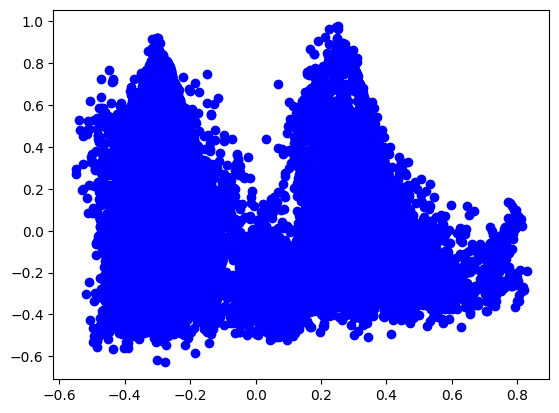

In [5]:
x = transformed[0]
y = transformed[1]
plt.scatter(x, y, color='blue')
plt.show()

The above code performs dimensionality reduction using Principal Component Analysis (PCA) and visualizes the results in a 2D plot. Let’s break down each part of the code in detail:

### 1. **Imports and Preprocessing**:
```python
from sklearn.decomposition import PCA
```
- **`from sklearn.decomposition import PCA`**: Imports the PCA class from the `sklearn.decomposition` module. PCA is a technique for reducing the dimensionality of datasets by transforming them into a new set of features called principal components.

```python
df_norm = (df - df.min()) / (df.max() - df.min())
```
- **`df_norm = (df - df.min()) / (df.max() - df.min())`**: This line normalizes the DataFrame `df` using min-max normalization. Min-max normalization scales the data to a range of [0, 1]. The formula used here is:
  \[
  \text{Normalized Value} = \frac{\text{Value} - \text{Min}}{\text{Max} - \text{Min}}
  \]
  This step is crucial because PCA is sensitive to the scale of the features. Normalizing ensures that all features contribute equally to the PCA.

### 2. **Applying PCA for Dimensionality Reduction**:
```python
pca = PCA(n_components=2) # 2-dimensional PCA
transformed = pd.DataFrame(pca.fit_transform(df_norm))
```
- **`pca = PCA(n_components=2)`**: Initializes the PCA object to reduce the dataset to 2 dimensions (two principal components).
  - **`n_components=2`**: Specifies that we want to reduce the dataset to 2 principal components. These components capture the maximum variance possible in a 2D space.
  
- **`transformed = pd.DataFrame(pca.fit_transform(df_norm))`**: Fits the PCA model to the normalized data and transforms it into a 2-dimensional space.
  - **`pca.fit_transform(df_norm)`**: First, the `fit` method calculates the principal components based on the variance in the data, and the `transform` method projects the original data onto these components.
  - **`pd.DataFrame(...)`**: Converts the transformed data into a pandas DataFrame, making it easier to work with and visualize.

### 3. **Visualizing the Transformed Dataset**:
```python
x = transformed[0]
y = transformed[1]
plt.scatter(x, y, color='blue')
plt.show()
```
- **`x = transformed[0]`** and **`y = transformed[1]`**: Extract the first and second principal components, which are stored as columns 0 and 1 in the `transformed` DataFrame. These represent the new features created by PCA.
- **`plt.scatter(x, y, color='blue')`**: Creates a scatter plot of the data points using the first principal component as the x-coordinate and the second principal component as the y-coordinate.
  - **`color='blue'`**: Sets the color of the points to blue.
  
- **`plt.show()`**: Displays the scatter plot.

### 4. **Understanding Principal Component Analysis (PCA)**:
- **PCA** is a technique used for dimensionality reduction, especially when dealing with high-dimensional datasets. It transforms the original features into a smaller set of uncorrelated features called principal components. These components are ranked by the amount of variance they capture from the original data.
- In this case, the code reduces the dataset to 2 dimensions while retaining as much of the original variance as possible.

### 5. **Purpose of Visualization**:
- The scatter plot shows how the data looks when reduced to 2 principal components. Each point represents a data instance in the reduced feature space. Patterns or clusters in this plot can help in understanding the structure of the data, making it useful for tasks like data exploration, clustering, or further analysis.

### Summary:
- The code normalizes the data and applies PCA to reduce it to 2 dimensions.
- It then visualizes the result using a scatter plot, allowing you to see how the data is distributed in the reduced feature space.

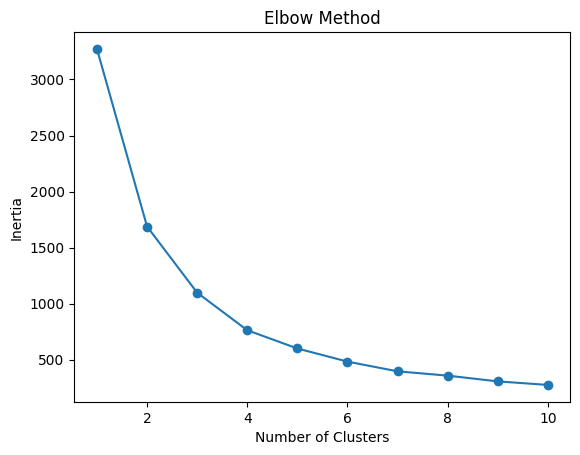

In [6]:
from sklearn.cluster import KMeans

data = list(zip(transformed[0], transformed[1]))
inertias = []

for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto') # n_init=10, random_state=0
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)

plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

The code you’ve provided applies the K-means clustering algorithm to data that has already undergone dimensionality reduction using PCA. It then uses the Elbow Method to help determine the optimal number of clusters for the dataset. Let’s break down the code step by step, explain its importance, and discuss the insights that can be derived from the output.

### 1. **Imports**:
```python
from sklearn.cluster import KMeans
```
- **`from sklearn.cluster import KMeans`**: Imports the KMeans class from `sklearn.cluster`. This class is used to apply the K-means clustering algorithm, which is a popular method for partitioning data into groups or clusters.

### 2. **Preparing the Data for Clustering**:
```python
data = list(zip(transformed[0], transformed[1]))
```
- **`data = list(zip(transformed[0], transformed[1]))`**: Combines the two principal components (stored in `transformed[0]` and `transformed[1]`) into a list of tuples. Each tuple represents a data point in the 2D feature space. For example, a tuple might look like `(x, y)`, where `x` and `y` are the coordinates of a point in the reduced feature space.

### 3. **Calculating Inertia for Different Numbers of Clusters**:
```python
inertias = []
```
- **`inertias = []`**: Initializes an empty list to store the inertia values for each number of clusters.

```python
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, n_init='auto') # n_init=10, random_state=0
  kmeans.fit(data)
  inertias.append(kmeans.inertia_)
```
- **`for i in range(1, 11):`**: Loops over different numbers of clusters, from 1 to 10.
- **`kmeans = KMeans(n_clusters=i, n_init='auto')`**: Initializes the KMeans model with `i` clusters.
  - **`n_clusters=i`**: Specifies the current number of clusters.
  - **`n_init='auto'`**: The `n_init` parameter controls how many times the K-means algorithm is run with different centroid seeds. The `'auto'` option automatically chooses a suitable value based on the dataset size. In earlier versions, this was typically set to 10.
  - The code previously had `n_init=10, random_state=0`, which is now simplified with `n_init='auto'`.
- **`kmeans.fit(data)`**: Fits the KMeans model to the data, computing the cluster centroids and assigning each data point to a cluster.
- **`inertias.append(kmeans.inertia_)`**: Appends the calculated inertia to the `inertias` list. Inertia measures how tightly the data points are clustered around the centroids. It is the sum of squared distances from each point to its nearest cluster center.

### 4. **Plotting the Elbow Curve**:
```python
plt.plot(range(1, 11), inertias, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()
```
- **`plt.plot(range(1, 11), inertias, marker='o')`**: Plots the number of clusters (1 to 10) on the x-axis and the corresponding inertia values on the y-axis. Each point is marked with a circle (`marker='o'`).
- **`plt.title('Elbow Method')`**: Sets the plot title as "Elbow Method".
- **`plt.xlabel('Number of Clusters')`**: Labels the x-axis as "Number of Clusters".
- **`plt.ylabel('Inertia')`**: Labels the y-axis as "Inertia".
- **`plt.show()`**: Displays the plot.

### 5. **Importance of the Code**:
- **Dimensionality Reduction**: Before this code is run, the dataset is reduced to 2 dimensions using PCA. This reduction helps visualize and cluster the data more efficiently, especially in cases where the original dataset has many features.
- **Clustering**: The code performs clustering using K-means and evaluates the clustering quality using the Elbow Method. The goal is to find the optimal number of clusters.
- **Elbow Method**: The Elbow Method is a technique to determine the ideal number of clusters by plotting the inertia (within-cluster variance) against the number of clusters. The "elbow" point in this plot represents the number of clusters beyond which adding more clusters provides diminishing returns in reducing inertia.

### 6. **Message and Insights from the Output**:
- **Elbow Point Identification**: The plot generated by this code shows a curve where inertia decreases as the number of clusters increases. Initially, inertia drops sharply, but after a certain point (the "elbow"), the rate of decrease becomes gradual. The point where the elbow occurs suggests the optimal number of clusters. For example, if the curve flattens at 3 clusters, it indicates that 3 clusters may be the best choice.
- **Trade-off Between Complexity and Variance**: The elbow point represents a balance between simplicity (fewer clusters) and variance reduction (better cluster fit). Choosing the number of clusters at the elbow minimizes overfitting while capturing the essential structure in the data.

### Summary:
- The code applies K-means clustering on 2D PCA-transformed data and uses the Elbow Method to determine the optimal number of clusters.
- The output plot helps you visually decide the number of clusters that best fits your data without making the model overly complex.
- This analysis is valuable in scenarios like customer segmentation, pattern recognition, and other applications where you need to group similar data points meaningfully.

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, n_init='auto') # n_init=10, random_state=0
kmeans.fit(data)

c=kmeans.labels_
print(c)

[0 0 0 ... 0 0 0]


The code you’ve shared applies K-means clustering to the given data, with a specific number of clusters (2 in this case), and then outputs the cluster assignments for each data point. Let’s break down the code step-by-step and discuss its importance and the insights that can be derived from the output.

### 1. **Imports**:
```python
from sklearn.cluster import KMeans
```
- **`from sklearn.cluster import KMeans`**: Imports the KMeans class from the `sklearn.cluster` module. K-means is a popular clustering algorithm used to partition data into distinct groups (clusters).

### 2. **K-means Clustering Setup**:
```python
kmeans = KMeans(n_clusters=2, n_init='auto') # n_init=10, random_state=0
```
- **`kmeans = KMeans(n_clusters=2, n_init='auto')`**: Initializes the KMeans model with the specified parameters:
  - **`n_clusters=2`**: Specifies that the algorithm should partition the data into 2 clusters.
  - **`n_init='auto'`**: The `n_init` parameter controls how many times the algorithm runs with different centroid seeds. The `'auto'` option automatically selects a suitable value based on the data size (it typically runs the algorithm 10 times and picks the best solution). This helps find better clustering results by avoiding local minima.

### 3. **Fitting the Model**:
```python
kmeans.fit(data)
```
- **`kmeans.fit(data)`**: Fits the KMeans model to the given dataset `data`. The model:
  - Calculates the centroids for the 2 clusters.
  - Assigns each data point to the nearest cluster based on the distance to the centroids.
  
The `data` variable here should be a 2D dataset, typically obtained after some form of preprocessing, such as PCA, in this case.

### 4. **Getting Cluster Labels**:
```python
c = kmeans.labels_
print(c)
```
- **`c = kmeans.labels_`**: After fitting the model, the `labels_` attribute contains the cluster assignment (label) for each data point. Since we specified `n_clusters=2`, each point is assigned either a label `0` or `1`, indicating which of the two clusters it belongs to.
- **`print(c)`**: Prints the array of cluster labels. For example, if the output is `[0, 1, 1, 0, 1, 0]`, it means:
  - The first point belongs to cluster 0.
  - The second point belongs to cluster 1.
  - The third point belongs to cluster 1, and so on.

### 5. **Importance of the Code**:
- **Clustering**: Clustering is a form of unsupervised learning where the goal is to group similar data points together. K-means clustering is widely used due to its simplicity and efficiency, especially for well-separated clusters.
- **Segmentation**: In real-world applications, clustering is used for tasks like customer segmentation (grouping similar customers), market analysis, and image compression. In this code, the data is being grouped into 2 distinct clusters.
- **Dimensionality Reduction Combined with Clustering**: In the context of earlier steps (like applying PCA), this code clusters data points in a lower-dimensional space, which can reveal underlying patterns that might be hidden in higher dimensions.

### 6. **Message and Insights from the Output**:
- **Understanding Group Membership**: The output array indicates how the data points are grouped. For example, if the data represents customer behavior, the labels could tell you which customers have similar purchasing patterns.
- **Identifying Patterns**: If the data points naturally fall into two distinct groups, this clustering will highlight those groups. The distribution of labels can give insights into the structure of the data.
- **Validation of Clustering**: The output can be visualized (e.g., using a scatter plot with different colors for each cluster) to see if the clustering makes sense. Ideally, points in the same cluster should be close to each other, while points in different clusters should be further apart.

### Summary:
- The code applies K-means clustering with 2 clusters to a dataset and outputs the cluster labels for each data point.
- This type of clustering is crucial for segmenting data and understanding group structures in datasets.
- The output labels tell you which cluster each data point belongs to, helping to identify and analyze patterns within the dataset.

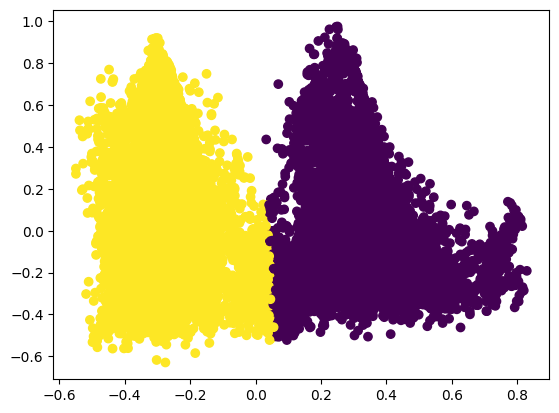

In [8]:
plt.scatter(transformed[0], transformed[1], c=kmeans.labels_)
plt.show()

# **Silhouette Coefficient**

The Silhouette Coefficient is defined for each sample and is composed of two scores:

**a**: *The mean distance between a sample and all other points in the same class.*

**b**: *The mean distance between a sample and all other points in the next nearest cluster.*


1. The score is bounded between -1 for incorrect clustering and +1 for highly dense clustering. Scores around zero indicate overlapping clusters.

2. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

3. The Silhouette Coefficient is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [9]:
from sklearn import metrics

print(metrics.silhouette_score(data, c, metric='euclidean'))

0.4886443782597567


# **Calinski-Harabasz Index**

Also known as the Variance Ratio Criterion - can be used to evaluate the model, where a higher Calinski-Harabasz score relates to a model with better defined clusters.

The index is the ratio of the sum of between-clusters dispersion and of within-cluster dispersion for all clusters (*where dispersion is defined as the sum of distances squared*).

1. The score is higher when clusters are dense and well separated, which relates to a standard concept of a cluster.

2. The score is fast to compute.

3. The Calinski-Harabasz index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained through DBSCAN.

In [10]:
metrics.calinski_harabasz_score(data, c)

19356.13480065826

# **Davies-Bouldin Index**

This index signifies the average ‘*similarity*’ between clusters, where the similarity is a measure that compares the distance between clusters with the size of the clusters themselves.

1. Zero is the lowest possible score. Values closer to zero indicate a better partition.

2. The computation of Davies-Bouldin is simpler than that of Silhouette scores.

3. The index is solely based on quantities and features inherent to the dataset as its computation only uses point-wise distances

4. The Davies-Boulding index is generally higher for convex clusters than other concepts of clusters, such as density based clusters like those obtained from DBSCAN.

5. The usage of centroid distance limits the distance metric to Euclidean space.

In [11]:
metrics.davies_bouldin_score(data, c)

0.860304882311826

The code and information you shared outline three common cluster evaluation metrics: the **Silhouette Coefficient**, the **Calinski-Harabasz Index**, and the **Davies-Bouldin Index**. Let’s discuss the purpose of each metric, how they are calculated, and what they indicate about the quality of the clusters.

### 1. **Silhouette Coefficient**:
The Silhouette Coefficient measures how well each data point fits within its cluster compared to the next nearest cluster. It’s a combination of two scores:
- **a**: The mean distance between a sample and all other points in the same cluster.
- **b**: The mean distance between a sample and all points in the next nearest cluster.

The Silhouette Coefficient for a sample is defined as:

$$\text{Silhouette Coefficient} = \frac{b - a}{\max(a, b)}$$


#### Key Points:
- The coefficient ranges from **-1** to **+1**:
  - **+1** indicates well-separated, dense clusters.
  - **0** indicates overlapping clusters or points near cluster boundaries.
  - **-1** indicates that points might be assigned to the wrong cluster.
- The metric is useful for evaluating clustering results and determining if the clusters are compact and well-separated.

#### Code Example:
```python
from sklearn import metrics
silhouette_score = metrics.silhouette_score(data, c, metric='euclidean')
print("Silhouette Coefficient:", silhouette_score)
```
- **`metrics.silhouette_score(data, c, metric='euclidean')`**: Calculates the Silhouette Coefficient using Euclidean distance as the metric.
- **`data`**: The input data used for clustering.
- **`c`**: The cluster labels predicted by the K-means model.

### 2. **Calinski-Harabasz Index**:
The Calinski-Harabasz Index (also known as the Variance Ratio Criterion) evaluates clusters based on the ratio of the sum of between-cluster dispersion to within-cluster dispersion.

The index is calculated as:
$$
\text{Calinski-Harabasz Index} = \frac{\text{between-cluster dispersion}}{\text{within-cluster dispersion}}
$$

#### Key Points:
- A higher score indicates better-defined clusters, meaning they are compact and well-separated.
- This index is fast to compute and is commonly used to evaluate clustering results.

#### Code Example:
```python
calinski_harabasz_score = metrics.calinski_harabasz_score(data, c)
print("Calinski-Harabasz Index:", calinski_harabasz_score)
```
- **`metrics.calinski_harabasz_score(data, c)`**: Computes the Calinski-Harabasz Index for the clustering result.

### 3. **Davies-Bouldin Index**:
The Davies-Bouldin Index measures the average similarity ratio between clusters. The similarity is defined as the ratio of the intra-cluster distance to the inter-cluster distance.

The index is defined as:
$$
\text{Davies-Bouldin Index} = \frac{1}{N} \sum_{i=1}^{N} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{i, j}} \right)
$$
Where:
- **s_i** and **s_j** are the average distances within clusters **i** and **j**.
- **d_{i, j}** is the distance between the centroids of clusters **i** and **j**.

#### Key Points:
- The index ranges from **0** to infinity, with **0** being the best possible score. Lower values indicate better clustering.
- It’s simpler to compute compared to the Silhouette score and works well for evaluating convex clusters.

#### Code Example:
```python
davies_bouldin_score = metrics.davies_bouldin_score(data, c)
print("Davies-Bouldin Index:", davies_bouldin_score)
```
- **`metrics.davies_bouldin_score(data, c)`**: Computes the Davies-Bouldin Index for the clustering result.

### **Importance of the Code and Insights**:
- These metrics help **quantitatively evaluate** the quality of clusters in an unsupervised learning context.
- They allow you to compare different clustering models or hyperparameter settings, guiding decisions on the optimal number of clusters or the best clustering algorithm for your data.
- **Silhouette Coefficient**: Provides an overall assessment of how well-separated and compact your clusters are.
- **Calinski-Harabasz Index**: A fast-to-compute metric that works well for convex clusters.
- **Davies-Bouldin Index**: Helps assess how well-separated and coherent your clusters are with lower scores being better.

### **Interpreting the Output**:
- If the Silhouette Coefficient is high (close to +1), the clusters are well-separated and dense.
- A high Calinski-Harabasz Index indicates clusters with low variance within and high variance between clusters.
- A low Davies-Bouldin Index signifies that the clusters are well-defined with minimal overlap or similarity.

These metrics provide valuable feedback for improving clustering performance by refining the number of clusters or adjusting model parameters.